## Empirical Validation: Composite Silhouette ($S_{mM})$ on Synthetic and Real-World Datasets

In [1]:
!pip install git+https://github.com/semoglou/composite_silhouette.git
from composite_silhouette import CompSil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris, load_wine, load_digits, fetch_openml

  Cloning https://github.com/semoglou/composite_silhouette.git to /tmp/pip-req-build-q0kfqvkn
  Running command git clone --filter=blob:none --quiet https://github.com/semoglou/composite_silhouette.git /tmp/pip-req-build-q0kfqvkn
  Resolved https://github.com/semoglou/composite_silhouette.git to commit 56c08ecb894293f9b50a3a132654e0775164a189
  Preparing metadata (setup.py) ... done


---

## Synthetic Datasets

### Synthetic Dataset 0.

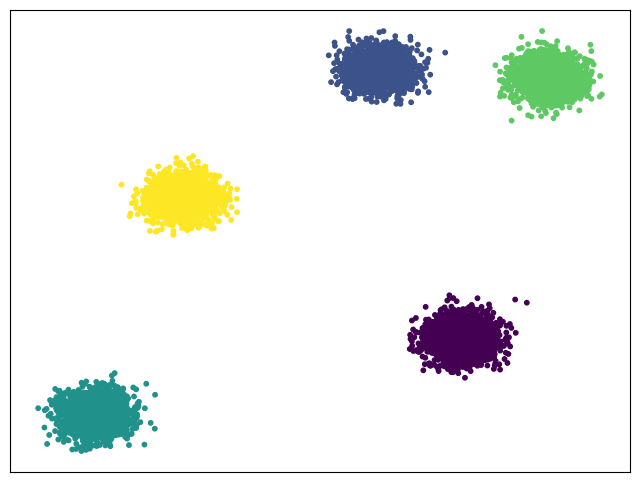

In [2]:
data, true_labels = make_blobs(n_samples=10000, centers=5, cluster_std=0.5, random_state=100)

# Scaling (Opt)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Quick check
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=true_labels, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.show()


Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,3.896560e-18,+,-0.033501,0.542110,0.575611,0.241625,0.758375,0.567517
3,3.896560e-18,+,-0.050343,0.671588,0.721930,0.237414,0.762586,0.709978
4,3.896560e-18,+,-0.038318,0.802907,0.841225,0.240420,0.759580,0.832013
5,1.193373e-01,-,-0.000217,0.872905,0.873121,0.500000,0.500000,0.873013
6,3.896560e-18,+,0.070788,0.762205,0.691417,0.767697,0.232303,0.745760
7,3.896560e-18,+,0.091131,0.663626,0.572495,0.772783,0.227217,0.642919
8,3.896560e-18,+,0.088019,0.581160,0.493141,0.772005,0.227995,0.561092
9,3.896560e-18,+,0.073934,0.512338,0.438404,0.768484,0.231516,0.495221
10,1.414679e-17,+,0.054206,0.455482,0.401275,0.763552,0.236448,0.442665


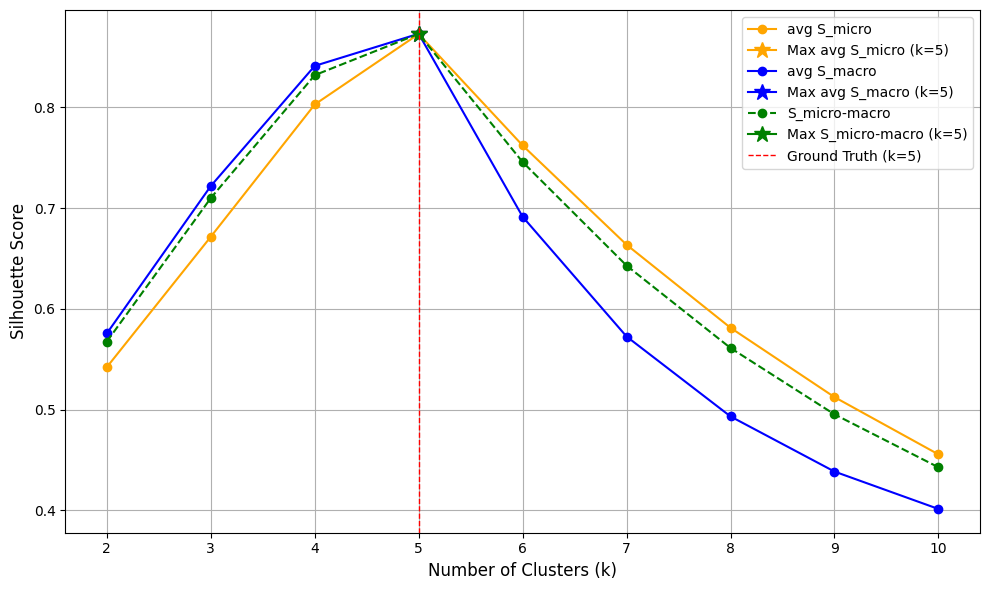


Optimal number of clusters based on composite silhouette score: 5


In [3]:
compsilhouette = CompSil(
    data=scaled_data,
    k_values=range(2, 11),     # Evaluate k from 2 to 10
    ground_truth=5,
    num_samples=100,           # 100 samples per k
    sample_size=500,           # 1000 data points per sample
    random_state=42)

compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
print("\nClustering Evaluation Results:")
display(results_df)

compsilhouette.plot_results()

optimal_k = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k}")

---

### Synthetic Dataset 1.

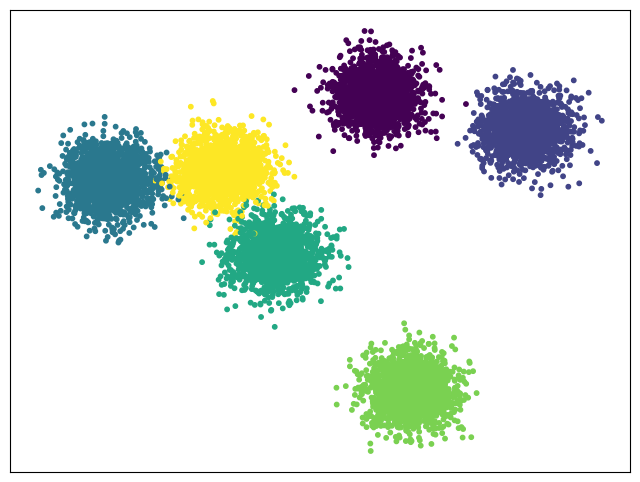

In [4]:
data, true_labels = make_blobs(n_samples=10000, centers=6, cluster_std=0.9, random_state=20)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=true_labels, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.show()


Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,4.172325e-06,+,-0.075553,0.482360,0.557913,0.231112,0.768888,0.540452
3,5.960464e-08,+,-0.048547,0.645490,0.694037,0.237863,0.762137,0.682489
4,5.960464e-08,+,-0.041419,0.621764,0.663184,0.239645,0.760355,0.653258
5,5.960464e-08,+,-0.029814,0.649134,0.678947,0.242547,0.757453,0.671716
6,8.325094e-01,-,0.001019,0.688773,0.687753,0.500000,0.500000,0.688263
7,5.960464e-08,+,0.040532,0.633489,0.592957,0.760133,0.239867,0.623766
8,5.960464e-08,+,0.055888,0.568859,0.512971,0.763972,0.236028,0.555668
9,5.960464e-08,+,0.056167,0.510069,0.453902,0.764042,0.235958,0.496816
10,5.960464e-08,+,0.051349,0.469711,0.418362,0.762837,0.237163,0.457533


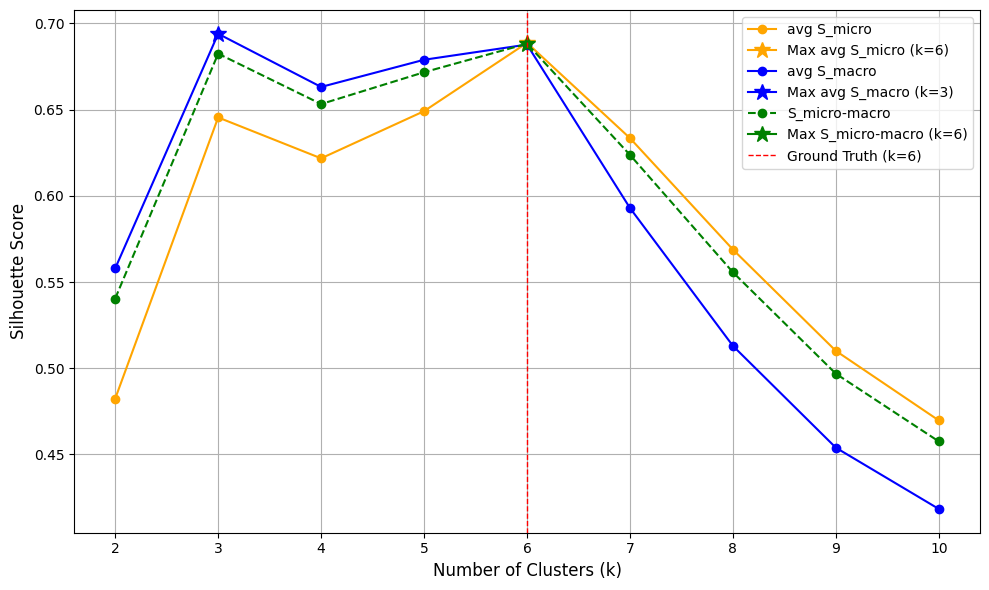


Optimal number of clusters based on composite silhouette score: 6


In [5]:
compsilhouette = CompSil(
    data=scaled_data,
    ground_truth=6,
    k_values=range(2, 11),
    num_samples=25,
    sample_size=1000,
    random_state=42)

compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
print("\nClustering Evaluation Results:")
display(results_df)

compsilhouette.plot_results()

optimal_k = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k}")

---

### Synthetic Dataset 2.

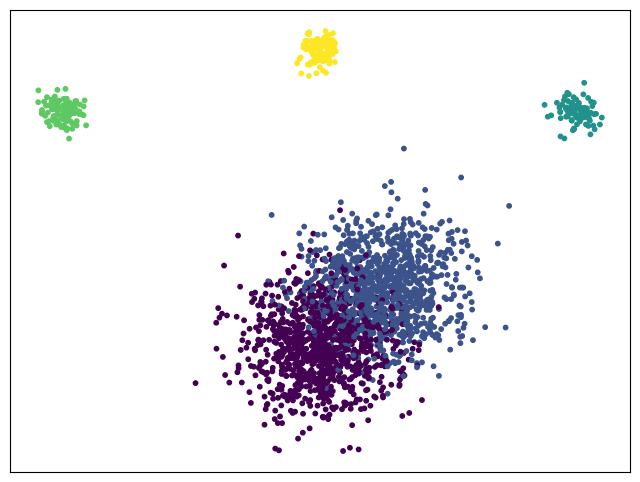

In [6]:
cluster_sizes = [1000, 1000, 100, 100, 100]  # 2 large, 3 small
centers = [
    (0, 0),   # large cluster #1
    (3, 3),   # large cluster #2 (not too far from #1, so they merge in small k)
    (12, 12), # small cluster #1
    (-12, 12),# small cluster #2
    (0, 15),  # small cluster #3
]
stds = [1.8, 1.8, 0.5, 0.5, 0.5]  # bigger std for large clusters, smaller for small

X, y = make_blobs(
    n_samples=cluster_sizes,
    centers=centers,
    cluster_std=stds,
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=10)
plt.xticks([])
plt.yticks([])
plt.show()


Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,3.896560e-18,+,0.094366,0.636813,0.542447,0.773592,0.226408,0.615448
3,3.005464e-07,+,-0.011017,0.623052,0.634069,0.247246,0.752754,0.631345
4,3.896560e-18,+,-0.148589,0.501849,0.650438,0.212853,0.787147,0.618810
5,3.896560e-18,+,-0.220548,0.473215,0.693763,0.194863,0.805137,0.650786
6,3.896560e-18,+,-0.213347,0.413352,0.626699,0.196663,0.803337,0.584742
7,3.896560e-18,+,-0.174677,0.412073,0.586750,0.206331,0.793669,0.550709
8,3.896560e-18,+,-0.145869,0.404683,0.550552,0.213533,0.786467,0.519404
9,3.896560e-18,+,-0.121850,0.400966,0.522815,0.219538,0.780462,0.496065
10,3.896560e-18,+,-0.101140,0.398000,0.499140,0.224715,0.775285,0.476412


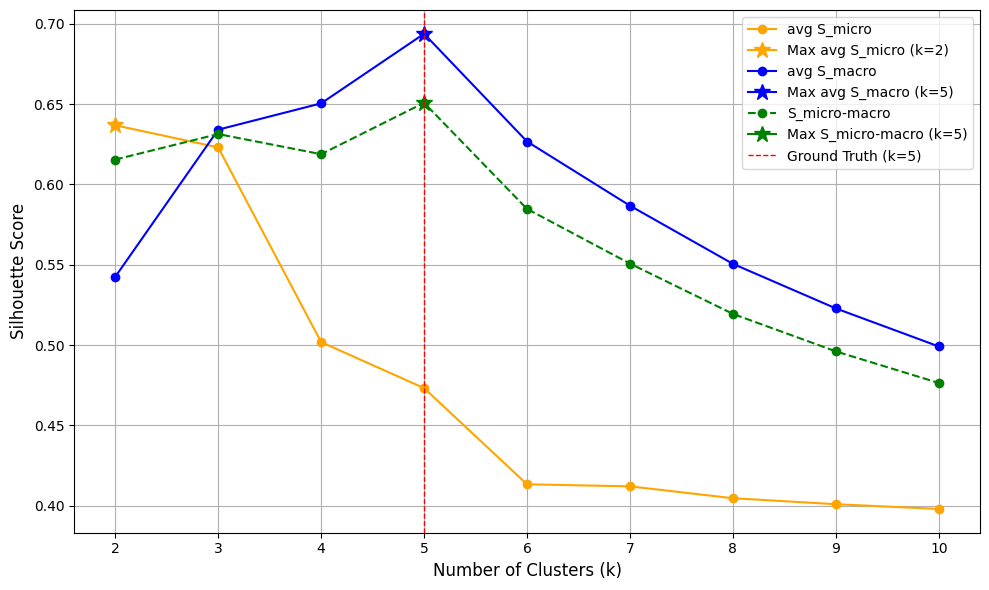


Optimal number of clusters based on composite silhouette score: 5


In [7]:
compsilhouette = CompSil(
    data=X_scaled,
    ground_truth=5,
    k_values=range(2, 11),
    num_samples=100,
    sample_size=1000,
    random_state=42
)

compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
print("\nClustering Evaluation Results:")
display(results_df)

compsilhouette.plot_results()

optimal_k = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k}")

---

### Synthetic Dataset 3.

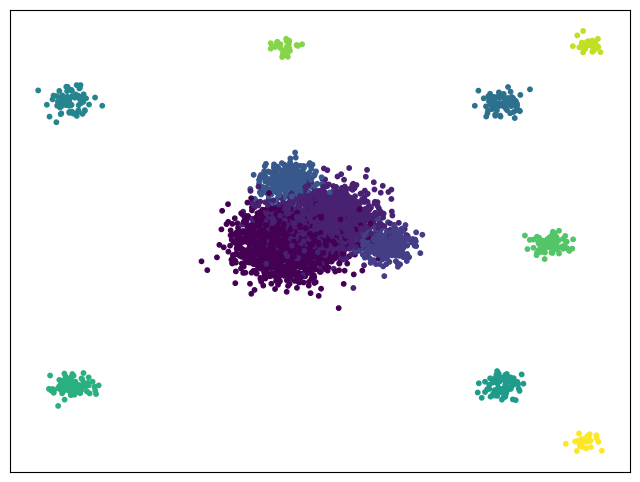

In [8]:
cluster_sizes = [1500, 1500, 300, 300] + [80]*5 + [30]*3
# That’s a total of 4 (big+medium) + 5 small + 3 tiny = 12 clusters

centers = [
    # Large clusters near each other
    (0, 0),        # Large #1
    (3, 3),        # Large #2

    # Medium clusters
    (8, 0),        # Medium #1
    (0, 8),        # Medium #2

    # 5 small clusters
    (18, 18),
    (-18, 18),
    (18, -18),
    (-18, -18),
    (22, 0),

    # 3 tiny clusters placed very far away
    (0, 25),
    (25, 25),
    (25, -25)
]

# Standard deviations
# - Large clusters bigger spread
# - Medium smaller
# - Small even smaller
# - Tiny very small spread
stds = [
    2.2, 2.2,   # large
    1.2, 1.2,   # medium
    0.9, 0.9, 0.9, 0.9, 0.9,  # 5 small
    0.6, 0.6, 0.6             # 3 tiny
]

X_E, y_E = make_blobs(
    n_samples=cluster_sizes,
    centers=centers,
    cluster_std=stds,
    random_state=47
)

scaler = StandardScaler()
X_E_scaled = scaler.fit_transform(X_E)

# Quick check
plt.figure(figsize=(8,6))
plt.scatter(X_E_scaled[:, 0], X_E_scaled[:, 1], c=y_E, s=10, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()


Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,4.218847e-12,+,0.120002,0.623759,0.503757,0.780000,0.220000,0.597359
3,9.364109e-07,+,0.075994,0.625012,0.549018,0.768998,0.231002,0.607457
4,5.673870e-02,-,0.018837,0.590660,0.571823,0.500000,0.500000,0.581242
5,4.326345e-04,+,-0.070181,0.568995,0.639177,0.232455,0.767545,0.622863
6,1.776357e-15,+,-0.195420,0.418177,0.613597,0.201145,0.798855,0.574289
7,1.776357e-15,+,-0.208899,0.409957,0.618856,0.197775,0.802225,0.577541
8,1.776357e-15,+,-0.213691,0.432489,0.646180,0.196577,0.803423,0.604173
9,1.776357e-15,+,-0.229477,0.423309,0.652786,0.192631,0.807369,0.608582
10,1.776357e-15,+,-0.237590,0.418140,0.655730,0.190602,0.809398,0.610444


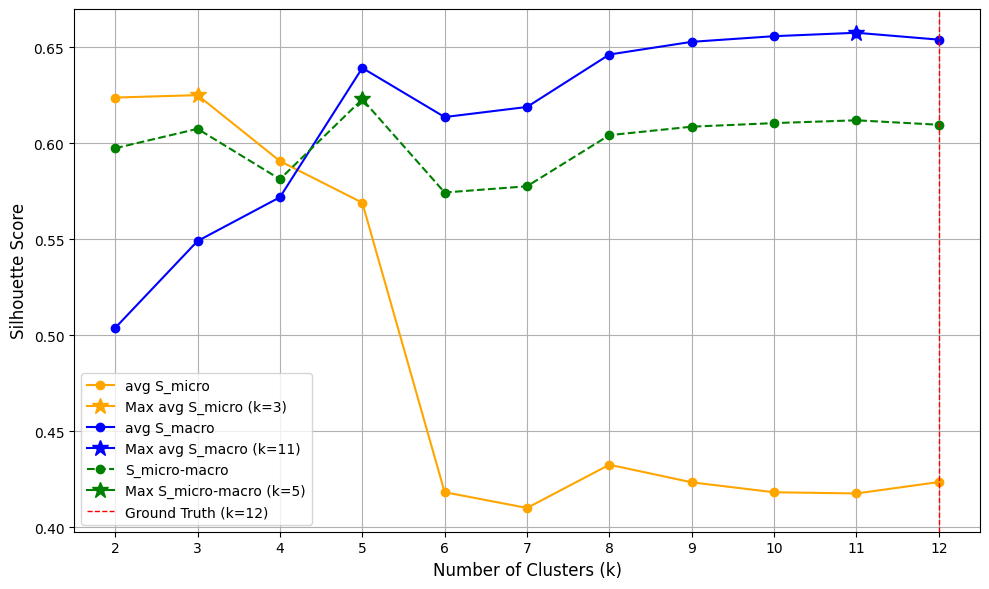


Optimal number of clusters based on composite silhouette score: 5


In [9]:
compsilhouette = CompSil(
    data=X_E_scaled,
    ground_truth=12,
    k_values=range(2, 13),
    num_samples=50,           # 100 samples per k
    sample_size=1500,          # 1000 data points per sample
    random_state=42
)

compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
print("\nClustering Evaluation Results:")
display(results_df)

compsilhouette.plot_results()

optimal_k = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k}")

---

## Real-World Datasets

### Iris Dataset


Iris Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.776357e-15,+,-0.026214,0.580326,0.606540,0.243447,0.756553,0.600158
3,2.695104e-01,-,0.001654,0.474879,0.473224,0.500000,0.500000,0.474051
4,5.546572e-02,-,0.006412,0.409303,0.402890,0.500000,0.500000,0.406096
5,5.178623e-02,-,-0.007859,0.373758,0.381617,0.500000,0.500000,0.377688
6,1.688807e-01,-,-0.005217,0.351385,0.356602,0.500000,0.500000,0.353993
7,2.420950e-02,+,-0.008706,0.343769,0.352475,0.247824,0.752176,0.350318
8,1.329606e-01,-,-0.006074,0.342197,0.348271,0.500000,0.500000,0.345234
9,1.978039e-03,+,-0.012199,0.337752,0.349951,0.246950,0.753050,0.346938
10,7.237748e-02,-,-0.006942,0.343426,0.350368,0.500000,0.500000,0.346897


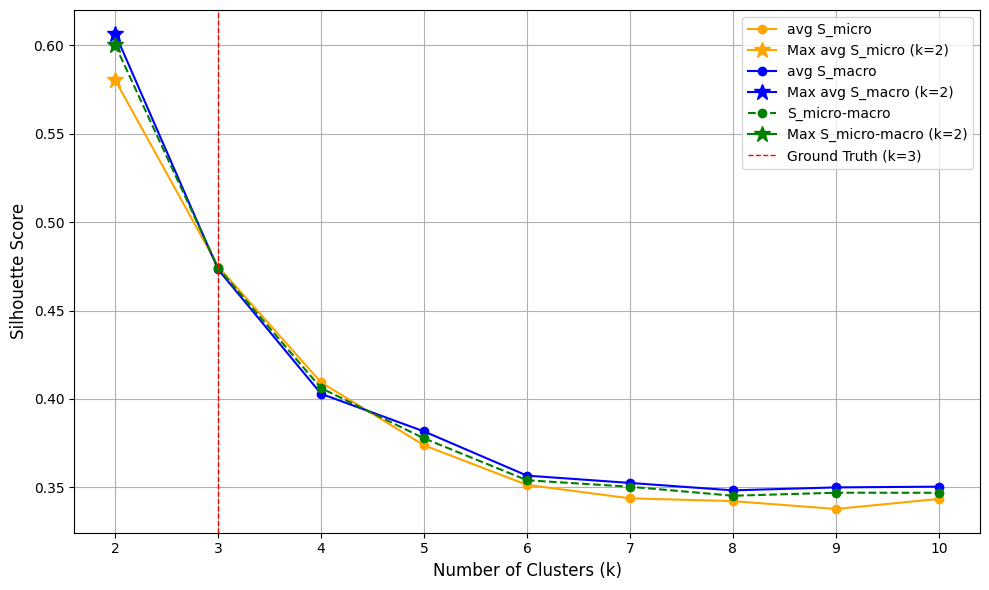


Optimal number of clusters based on composite silhouette score: 2


In [10]:
data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target
num_classes = len(set(y_iris))

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

compsilhouette = CompSil(
    data=X_iris_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=50,
    sample_size=int(len(X_iris_scaled) * 0.6),
    random_state=45
)

compsilhouette.evaluate()

results_df_iris = compsilhouette.get_results_dataframe()
print("\nIris Clustering Evaluation Results:")
display(results_df_iris)

compsilhouette.plot_results()

optimal_k_iris = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k_iris}")

---

### Wine Dataset


Wine Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,3.391119e-15,+,-0.006009,0.259881,0.265890,0.248498,0.751502,0.264396
3,2.093894e-15,+,-0.004626,0.281249,0.285875,0.248843,0.751157,0.284723
4,8.491130e-17,+,0.025766,0.244442,0.218676,0.756442,0.243558,0.238167
5,1.305506e-14,+,0.026990,0.205475,0.178485,0.756747,0.243253,0.198909
6,2.378601e-11,+,0.021094,0.181612,0.160518,0.755274,0.244726,0.176450
7,5.142648e-08,+,0.014699,0.167045,0.152346,0.753675,0.246325,0.163425
8,3.038301e-03,+,0.005930,0.146795,0.140865,0.751482,0.248518,0.145321
9,8.178060e-01,-,-0.001052,0.141902,0.142954,0.500000,0.500000,0.142428
10,3.218734e-02,+,-0.004744,0.136684,0.141428,0.248814,0.751186,0.140248


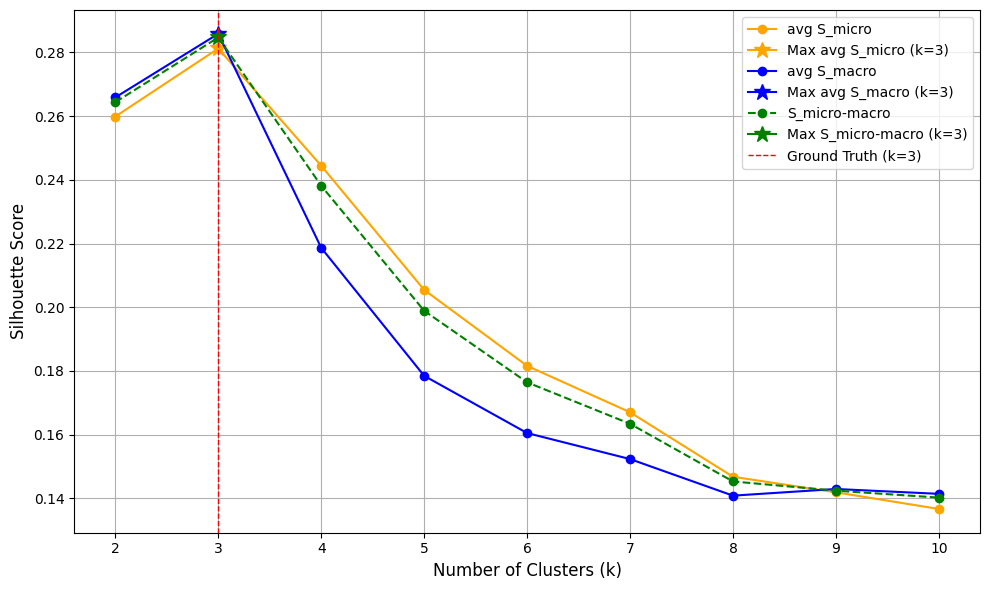


Optimal number of clusters for Wine based on composite silhouette score: 3


In [11]:
data_wine = load_wine()
X_wine = data_wine.data
y_wine = data_wine.target
num_classes = len(set(y_wine))

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

compsilhouette = CompSil(
    data=X_wine_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=100,
    sample_size=int(0.8*len(X_wine_scaled)),
    random_state=42
)

compsilhouette.evaluate()

results_df_wine = compsilhouette.get_results_dataframe()
print("\nWine Clustering Evaluation Results:")
display(results_df_wine)

compsilhouette.plot_results()

optimal_k_wine = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Wine based on composite silhouette score: {optimal_k_wine}")

---

### Pendigits Dataset


Pendigits Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,2.399644e-08,+,0.006124,0.282615,0.276491,0.751531,0.248469,0.281093
3,6.536104e-17,+,-0.009161,0.276843,0.286003,0.247710,0.752290,0.283734
4,1.040096e-16,+,0.001504,0.318864,0.317360,0.750376,0.249624,0.318488
5,7.955278e-06,+,0.004718,0.330173,0.325455,0.751180,0.248820,0.328999
6,1.974672e-09,+,0.005741,0.348229,0.342487,0.751435,0.248565,0.346802
7,1.019367e-10,+,0.006646,0.355238,0.348592,0.751661,0.248339,0.353587
8,6.102515e-14,+,0.006429,0.351785,0.345356,0.751607,0.248393,0.350188
9,8.962418e-08,+,0.006318,0.339808,0.333490,0.751579,0.248421,0.338239
10,8.787951e-12,+,0.005674,0.329673,0.323999,0.751419,0.248581,0.328262


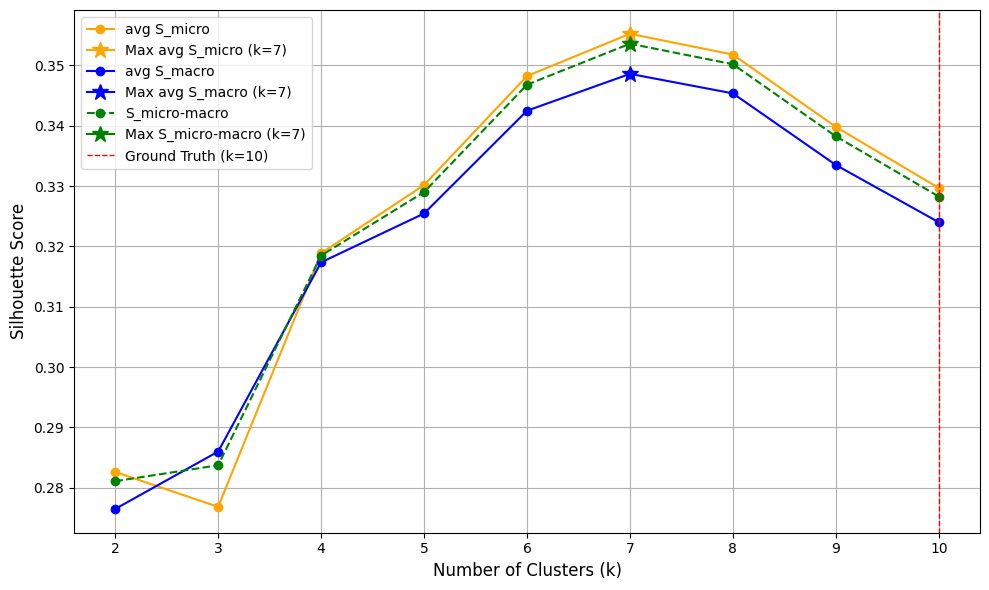


Optimal number of clusters for Pendigits based on composite silhouette score: 7


In [12]:
data_pendigits = fetch_openml(name='pendigits', version=1, as_frame=False)
X_pendigits = data_pendigits.data
y_pendigits = data_pendigits.target
num_classes = len(set(y_pendigits))

scaler = StandardScaler()
X_pendigits_scaled = scaler.fit_transform(X_pendigits)

pca = PCA(n_components=0.8)
X_pendigits_reduced = pca.fit_transform(X_pendigits_scaled)

compsilhouette = CompSil(
    data=X_pendigits_reduced,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=100,
    sample_size=int(len(X_pendigits_reduced) * 0.7),
    random_state=42
)

compsilhouette.evaluate()

results_df_pendigits = compsilhouette.get_results_dataframe()
print("\nPendigits Clustering Evaluation Results:")
display(results_df_pendigits)

compsilhouette.plot_results()

optimal_k_pendigits = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Pendigits based on composite silhouette score: {optimal_k_pendigits}")

---

### Digits Dataset


Digits Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.612265e-08,+,-0.005667,0.113199,0.118866,0.248583,0.751417,0.117457
3,5.621316e-16,+,-0.004606,0.124632,0.129238,0.248848,0.751152,0.128092
4,5.838880e-12,+,-0.008151,0.129293,0.137443,0.247962,0.752038,0.135422
5,1.603396e-16,+,-0.015656,0.137162,0.152819,0.246086,0.753914,0.148966
6,6.702409e-18,+,-0.019423,0.148856,0.168278,0.245144,0.754856,0.163517
7,4.266323e-18,+,-0.018201,0.159029,0.177230,0.245450,0.754550,0.172762
8,4.139374e-18,+,-0.014201,0.166388,0.180589,0.246450,0.753550,0.177089
9,9.893009e-18,+,-0.009110,0.170282,0.179392,0.247722,0.752278,0.177135
10,2.492828e-11,+,-0.004999,0.174136,0.179136,0.248750,0.751250,0.177892


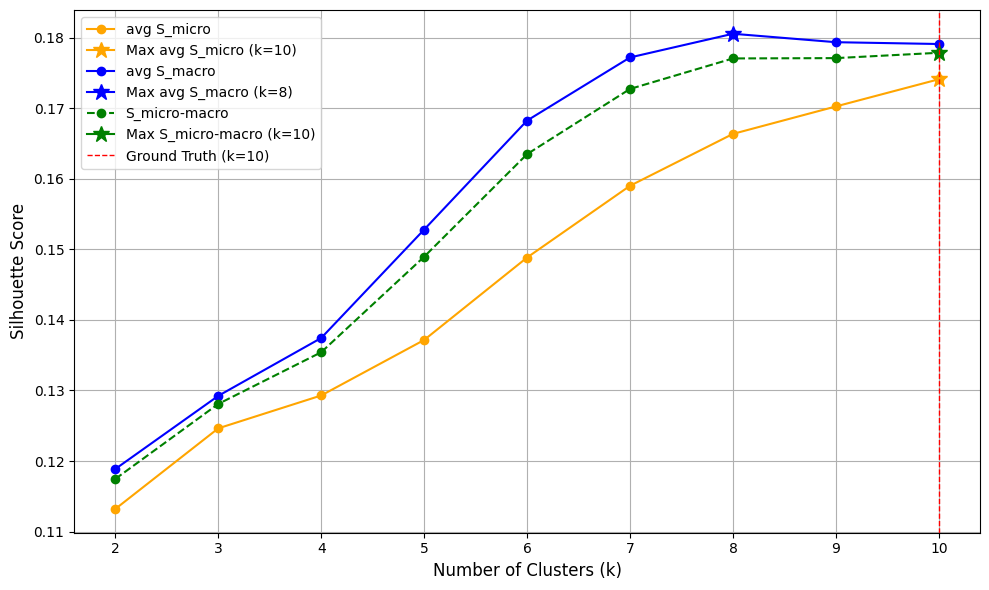


Optimal number of clusters based on composite silhouette score: 10


In [13]:
data_digits = load_digits()
X_digits = data_digits.data

pca = PCA(n_components=0.999)
X_digits_reduced = pca.fit_transform(X_digits)

compsilhouette = CompSil(
    data=X_digits_reduced,
    ground_truth=10,
    k_values=range(2, 11),
    num_samples=100,
    sample_size=400,
    random_state=42
)

compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
print("\nDigits Clustering Evaluation Results:")
display(results_df)

compsilhouette.plot_results()

optimal_k_digits = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters based on composite silhouette score: {optimal_k_digits}")

---

### Covertype Dataset


Covertype Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,0.003906,+,-0.096111,0.352340,0.448451,0.225972,0.774028,0.426733
3,0.003906,+,-0.160312,0.153536,0.313848,0.209922,0.790078,0.280195
4,0.001953,+,-0.179430,0.102336,0.281766,0.205143,0.794857,0.244958
5,0.001953,+,-0.207433,0.110316,0.317749,0.198142,0.801858,0.276648
6,0.001953,+,-0.220197,0.104848,0.325045,0.194951,0.805049,0.282117
7,0.001953,+,-0.241547,0.104127,0.345675,0.189613,0.810387,0.299874
8,0.001953,+,-0.191430,0.119787,0.311217,0.202142,0.797858,0.272521
9,0.001953,+,-0.204602,0.128578,0.333180,0.198850,0.801150,0.292495
10,0.001953,+,-0.213451,0.136061,0.349513,0.196637,0.803363,0.307540


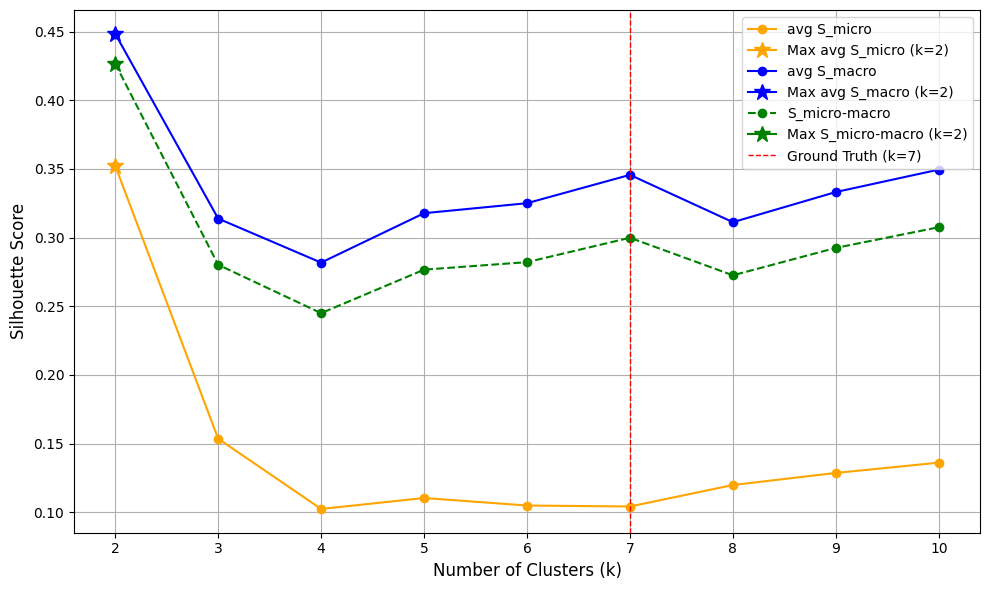


Optimal number of clusters for Covertype based on composite silhouette score: 2


In [14]:
data_covertype = fetch_openml(name='covertype', version=1, as_frame=False)
X_covertype = data_covertype.data
y_covertype = data_covertype.target
num_classes = len(set(y_covertype))

imputer = SimpleImputer(strategy='mean')
X_covertype = imputer.fit_transform(X_covertype)

scaler = StandardScaler()
X_covertype_scaled = scaler.fit_transform(X_covertype)

compsilhouette = CompSil(
    data=X_covertype_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=10,
    sample_size=int(len(X_covertype_scaled) * 0.4),
    random_state=42
)

compsilhouette.evaluate()

results_df_covertype = compsilhouette.get_results_dataframe()
print("\nCovertype Clustering Evaluation Results:")
display(results_df_covertype)

compsilhouette.plot_results()

optimal_k_covertype = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Covertype based on composite silhouette score: {optimal_k_covertype}")

---

### Mice Protein Dataset


Mice Protein Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.595764e-34,+,-0.002864,0.146130,0.148994,0.249284,0.750716,0.148280
3,5.816299e-15,+,-0.003797,0.130907,0.134705,0.249051,0.750949,0.133759
4,2.448109e-03,+,-0.005540,0.121309,0.126849,0.248615,0.751385,0.125472
5,1.665012e-07,+,-0.003500,0.120365,0.123865,0.249125,0.750875,0.122993
6,3.237168e-03,+,-0.004738,0.119998,0.124735,0.248816,0.751184,0.123557
7,4.341387e-01,-,-0.008267,0.120806,0.129073,0.500000,0.500000,0.124939
8,1.960448e-10,+,-0.013903,0.122830,0.136732,0.246524,0.753476,0.133305
9,8.274316e-24,+,-0.018548,0.124339,0.142888,0.245363,0.754637,0.138336
10,2.286898e-28,+,-0.019710,0.124187,0.143898,0.245072,0.754928,0.139067


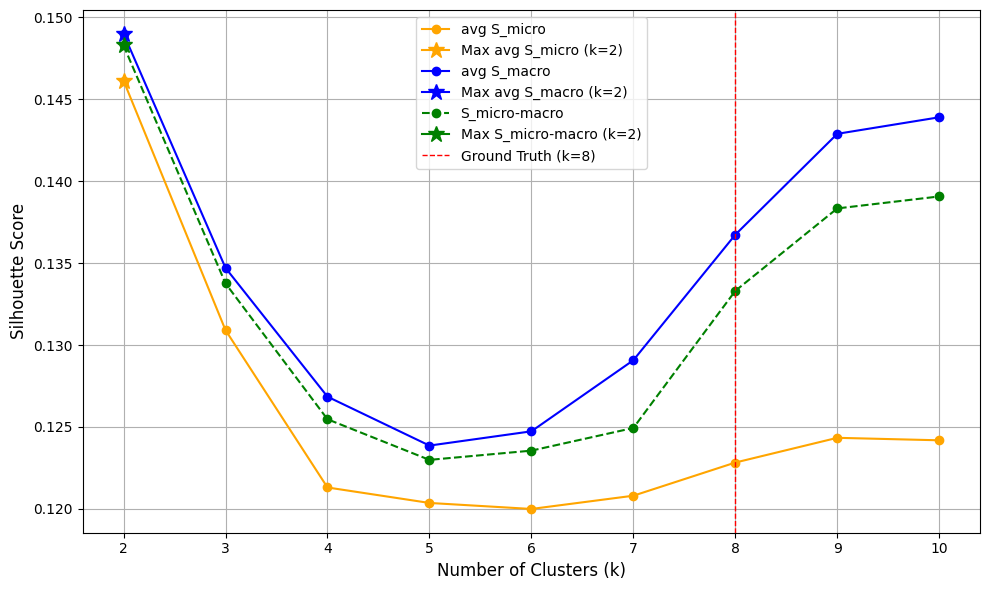


Optimal number of clusters for Mice Protein based on composite silhouette score: 2


In [15]:
data_mice = fetch_openml(name='MiceProtein', version=4, parser='auto')
X_mice = data_mice.data
y_mice = data_mice.target
num_classes = len(set(y_mice))

imputer = SimpleImputer(strategy='mean')
X_mice = imputer.fit_transform(X_mice)

scaler = StandardScaler()
X_mice_scaled = scaler.fit_transform(X_mice)

compsilhouette = CompSil(
    data=X_mice_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=200,
    sample_size=int(len(X_mice_scaled) * 0.8),
    random_state=42
)

compsilhouette.evaluate()

results_df_mice = compsilhouette.get_results_dataframe()
print("\nMice Protein Clustering Evaluation Results:")
display(results_df_mice)

compsilhouette.plot_results()

optimal_k_mice = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Mice Protein based on composite silhouette score: {optimal_k_mice}")

---

### Gas Sensor Dataset


Gas Sensor Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.776357e-15,+,0.085161,0.435817,0.350656,0.771290,0.228710,0.416339
3,1.776357e-15,+,0.129087,0.407974,0.278887,0.782272,0.217728,0.379868
4,1.776357e-15,+,0.136264,0.393348,0.257084,0.784066,0.215934,0.363924
5,1.776357e-15,+,0.112445,0.354589,0.242144,0.778111,0.221889,0.329638
6,1.776357e-15,+,0.095041,0.320584,0.225543,0.773760,0.226240,0.299082
7,1.776357e-15,+,0.083991,0.306397,0.222406,0.770998,0.229002,0.287163
8,1.776357e-15,+,0.070058,0.286589,0.216531,0.767514,0.232486,0.270302
9,1.776357e-15,+,0.067503,0.275956,0.208452,0.766876,0.233124,0.260219
10,1.776357e-15,+,0.063388,0.268433,0.205044,0.765847,0.234153,0.253590


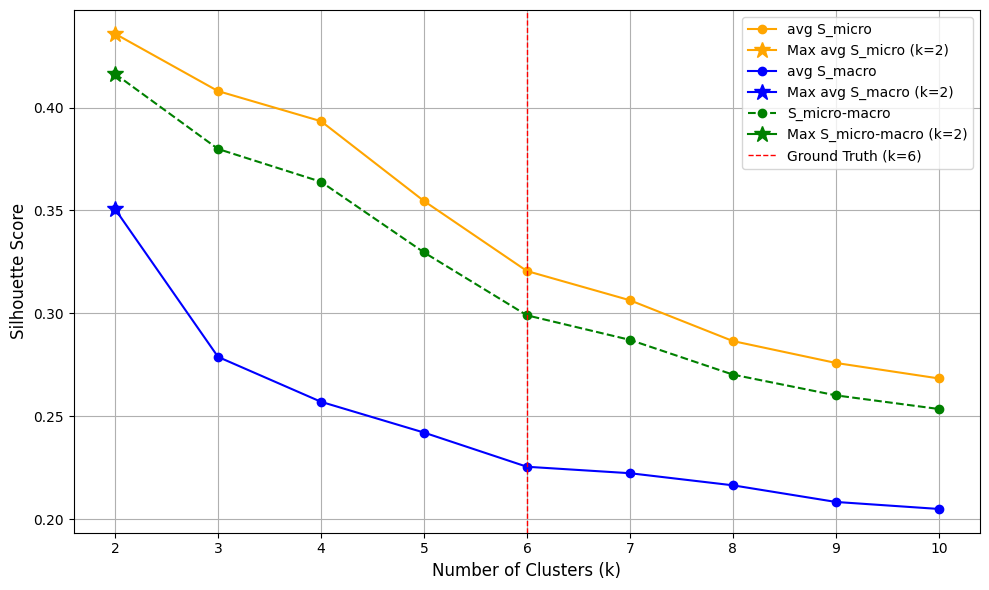


Optimal number of clusters for Gas Sensor based on composite silhouette score: 2


In [16]:
data_gas = fetch_openml(name='gas-drift', version=1, as_frame=False)
X_gas = data_gas.data
y_gas = data_gas.target
num_classes = len(set(y_gas))

imputer = SimpleImputer(strategy='mean')
X_gas = imputer.fit_transform(X_gas)

scaler = StandardScaler()
X_gas_scaled = scaler.fit_transform(X_gas)

compsilhouette = CompSil(
    data=X_gas_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=50,
    sample_size=int(len(X_gas_scaled) * 0.6),
    random_state=42
)

compsilhouette.evaluate()

results_df_gas = compsilhouette.get_results_dataframe()
print("\nGas Sensor Clustering Evaluation Results:")
display(results_df_gas)

compsilhouette.plot_results()

optimal_k_gas = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Gas Sensor based on composite silhouette score: {optimal_k_gas}")

---

### Glass Dataset


Gas Sensor Clustering Evaluation Results:


,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,4.380674e-11,+,0.114172,0.556629,0.442457,0.778543,0.221457,0.531345
3,1.563194e-13,+,0.123490,0.553580,0.430090,0.780872,0.219128,0.526520
4,2.994405e-11,+,0.086876,0.488125,0.401250,0.771719,0.228281,0.468293
5,1.260182e-08,+,0.085639,0.460331,0.374692,0.771410,0.228590,0.440755
6,1.214102e-07,+,0.084989,0.434403,0.349415,0.771247,0.228753,0.414962
7,6.336807e-09,+,0.086014,0.412074,0.326060,0.771503,0.228497,0.392420
8,4.028586e-06,+,0.057565,0.367081,0.309516,0.764391,0.235609,0.353518
9,4.153236e-04,+,0.047557,0.338870,0.291313,0.761889,0.238111,0.327546
10,3.586157e-06,+,0.053209,0.325270,0.272060,0.763302,0.236698,0.312675


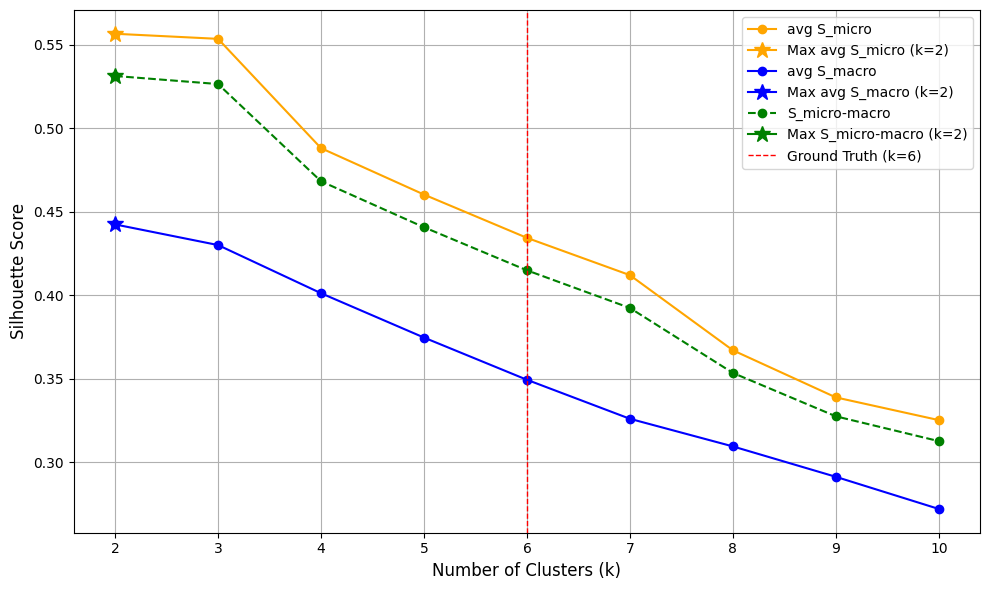


Optimal number of clusters for Gas Sensor based on composite silhouette score: 2


In [17]:
data_glass = fetch_openml(name='glass', version=1, parser='auto')
X_glass = data_glass.data
y_glass = data_glass.target
num_classes = len(set(y_gas))

scaler = StandardScaler()
X_glass_scaled = scaler.fit_transform(X_glass)
X_glass_scaled= X_glass
compsilhouette = CompSil(
    data=X_glass_scaled,
    ground_truth=num_classes,
    k_values=range(2, 11),
    num_samples=50,
    sample_size=int(len(X_glass_scaled) * 0.7),
    random_state=42
)

compsilhouette.evaluate()

results_df_gas = compsilhouette.get_results_dataframe()
print("\nGas Sensor Clustering Evaluation Results:")
display(results_df_gas)

compsilhouette.plot_results()

optimal_k_gas = compsilhouette.get_optimal_k()
print(f"\nOptimal number of clusters for Gas Sensor based on composite silhouette score: {optimal_k_gas}")